In [1]:
#Soru1

import tensorflow as tf
from tensorflow.keras import models, layers
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [11]:
dataset_path = "C:\Bananat"
dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_path)
#dataset = tf.keras.preprocessing.image_dataset_from_directory("C:/Users/Pc/Desktop/Bananat")

Found 13478 files belonging to 4 classes.


In [12]:
labels = dataset.class_names
labels

['overripe', 'ripe', 'rotten', 'unripe']

In [13]:
img_size = (64, 64)

In [14]:
data = []
for label in labels:
    label_path = os.path.join(dataset_path, label)
    for img_file in os.listdir(label_path):
        img_path = os.path.join(label_path, img_file)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        data.append((img_array, label))

In [15]:
X = np.array([item[0] for item in data])
y = np.array([labels.index(item[1]) for item in data])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [21]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


303/303 [==============================] - 22s 68ms/step - loss: 7.2548 - accuracy: 0.4604 - val_loss: 1.1289 - val_accuracy: 0.4829
Epoch 2/10
303/303 [==============================] - 20s 66ms/step - loss: 0.9741 - accuracy: 0.5653 - val_loss: 1.0188 - val_accuracy: 0.4977
Epoch 3/10
303/303 [==============================] - 20s 64ms/step - loss: 0.9886 - accuracy: 0.5451 - val_loss: 0.7630 - val_accuracy: 0.6775
Epoch 4/10
303/303 [==============================] - 20s 67ms/step - loss: 0.7953 - accuracy: 0.6671 - val_loss: 0.8141 - val_accuracy: 0.6691
Epoch 5/10
303/303 [==============================] - 20s 64ms/step - loss: 0.6889 - accuracy: 0.7297 - val_loss: 3.5519 - val_accuracy: 0.4263
Epoch 6/10
303/303 [==============================] - 20s 67ms/step - loss: 1.1231 - accuracy: 0.6110 - val_loss: 0.7499 - val_accuracy: 0.7044
Epoch 7/10
303/303 [==============================] - 22s 72ms/step - loss: 0.6764 - accuracy: 0.7295 - val_loss: 0.6792 - val_accurac

In [22]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

85/85 [==============================] - 1s 11ms/step
Test Accuracy: 0.8186
Precision: 0.8258
Recall: 0.8186
F1 Score: 0.8182
Confusion Matrix:


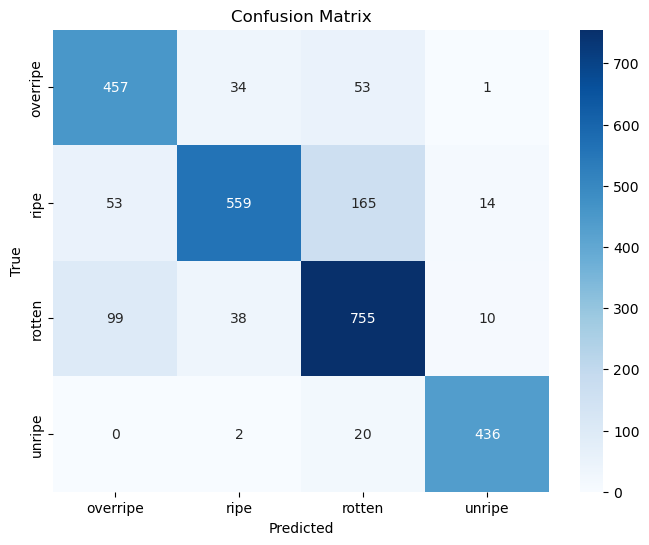

Classification Report:
              precision    recall  f1-score   support

    overripe       0.75      0.84      0.79       545
        ripe       0.88      0.71      0.79       791
      rotten       0.76      0.84      0.80       902
      unripe       0.95      0.95      0.95       458

    accuracy                           0.82      2696
   macro avg       0.83      0.83      0.83      2696
weighted avg       0.83      0.82      0.82      2696



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Modelin tahminlerini alın
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)
 

In [ ]:
#Soru2

In [24]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58889256/58889256 [==============================] - 51s 1us/step


In [25]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [26]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [29]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
303/303 [==============================] - 143s 468ms/step - loss: 1.8164 - accuracy: 0.7837 - val_loss: 0.6435 - val_accuracy: 0.8184
Epoch 2/10
303/303 [==============================] - 138s 457ms/step - loss: 0.4606 - accuracy: 0.8456 - val_loss: 0.3903 - val_accuracy: 0.8684
Epoch 3/10
303/303 [==============================] - 192s 635ms/step - loss: 0.3718 - accuracy: 0.8701 - val_loss: 0.3426 - val_accuracy: 0.8804
Epoch 4/10
303/303 [==============================] - 220s 725ms/step - loss: 0.3069 - accuracy: 0.8945 - val_loss: 0.3283 - val_accuracy: 0.8934
Epoch 5/10
303/303 [==============================] - 135s 444ms/step - loss: 0.2823 - accuracy: 0.8996 - val_loss: 0.3276 - val_accuracy: 0.8971
Epoch 6/10
303/303 [==============================] - 122s 403ms/step - loss: 0.2735 - accuracy: 0.8995 - val_loss: 0.3154 - val_accuracy: 0.8897
Epoch 7/10
303/303 [==============================] - 122s 402ms/step - loss: 0.2672 - accuracy: 0.9060 - val_loss: 0.3023 -

In [30]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

85/85 [==============================] - 65s 750ms/step
Test Accuracy: 0.9121
Precision: 0.9144
Recall: 0.9121
F1 Score: 0.9120
Confusion Matrix:


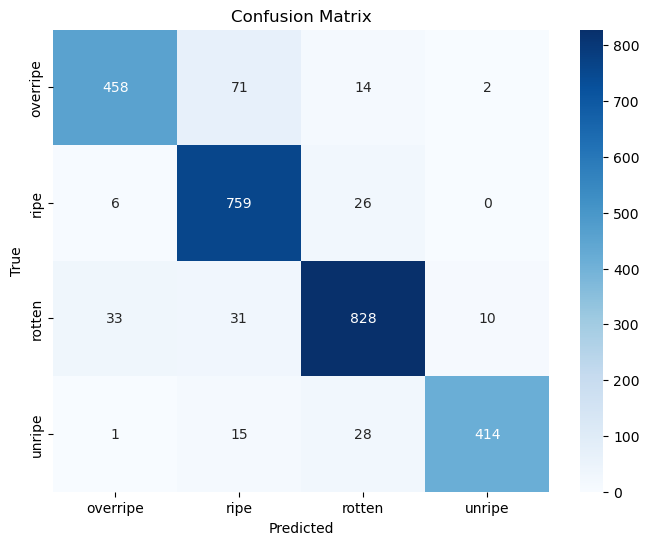

Classification Report:
              precision    recall  f1-score   support

    overripe       0.92      0.84      0.88       545
        ripe       0.87      0.96      0.91       791
      rotten       0.92      0.92      0.92       902
      unripe       0.97      0.90      0.94       458

    accuracy                           0.91      2696
   macro avg       0.92      0.91      0.91      2696
weighted avg       0.91      0.91      0.91      2696



In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Modelin tahminlerini alın
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

85/85 [==============================] - 64s 758ms/step - loss: 0.2614 - accuracy: 0.9121
Test Accuracy: 0.9120919704437256


In [ ]:
#Soru3

In [33]:
from keras.applications.efficientnet import EfficientNetB0

my_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

16705208/16705208 [==============================] - 14s 1us/step


In [34]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(my_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [35]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=4)
y_val_encoded = to_categorical(y_val, num_classes=4)

In [37]:
history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val_encoded))

Epoch 1/10
303/303 [==============================] - 268s 609ms/step - loss: 0.3166 - accuracy: 0.8930 - val_loss: 0.4467 - val_accuracy: 0.8795
Epoch 2/10
303/303 [==============================] - 186s 612ms/step - loss: 0.1694 - accuracy: 0.9449 - val_loss: 0.1392 - val_accuracy: 0.9527
Epoch 3/10
303/303 [==============================] - 184s 606ms/step - loss: 0.1430 - accuracy: 0.9527 - val_loss: 0.1425 - val_accuracy: 0.9518
Epoch 4/10
303/303 [==============================] - 118s 388ms/step - loss: 0.1197 - accuracy: 0.9607 - val_loss: 0.1400 - val_accuracy: 0.9583
Epoch 5/10
303/303 [==============================] - 104s 343ms/step - loss: 0.1071 - accuracy: 0.9653 - val_loss: 0.1174 - val_accuracy: 0.9592
Epoch 6/10
303/303 [==============================] - 106s 351ms/step - loss: 0.0906 - accuracy: 0.9692 - val_loss: 0.1041 - val_accuracy: 0.9703
Epoch 7/10
303/303 [==============================] - 164s 540ms/step - loss: 0.0913 - accuracy: 0.9690 - val_loss: 0.0966 -

In [38]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

85/85 [==============================] - 32s 200ms/step
Test Accuracy: 0.9781
Precision: 0.9784
Recall: 0.9781
F1 Score: 0.9781
Confusion Matrix:


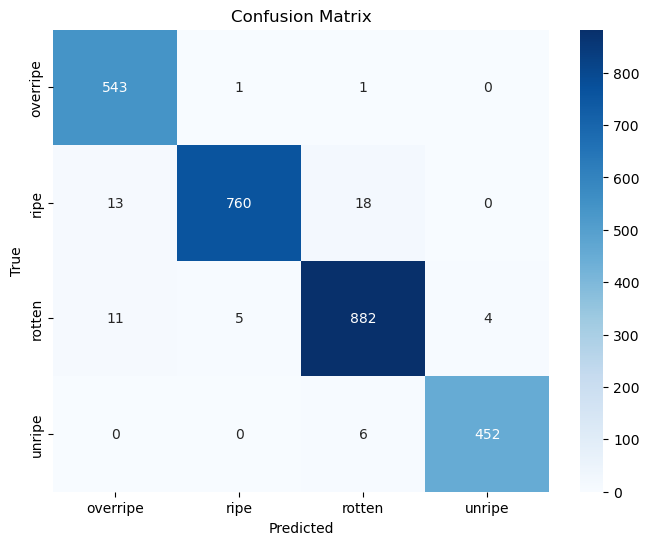

Classification Report:
              precision    recall  f1-score   support

    overripe       0.96      1.00      0.98       545
        ripe       0.99      0.96      0.98       791
      rotten       0.97      0.98      0.98       902
      unripe       0.99      0.99      0.99       458

    accuracy                           0.98      2696
   macro avg       0.98      0.98      0.98      2696
weighted avg       0.98      0.98      0.98      2696



In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Modelin tahminlerini alın
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)